# Part II - The patterns of the usage of the bike-sharing services
## by Jinwoong Nam

## Investigation Overview

In this investigation, I aim to look at the pattern of the usage of the bike-sharing service that can give many insights into developing strategies to help encourage more people to use the services. To do this, duration, start time, user type (subscriber or customer), and whether or not bike sharing is used for the whole trip are explored.


## Dataset Overview

The data consisted of information regarding 183,412 usages of the bike-sharing service in the greater San Francisco Bay area during February 2019. The attributes included duration, start/end time, station, member birth year, member gender, user type, whether or not bike sharing is used for the whole trip, and so on. 8,460 data points were removed from the analysis due to missing information.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
# copy the original dataframe
df_clean = df.copy()

# remove the null rows
df_clean = df_clean[df_clean['start_station_id'].notna()].reset_index(drop=True)
df_clean = df_clean[df_clean['member_birth_year'].notna()].reset_index(drop=True)

# change the data type
df_clean['start_time'] = pd.to_datetime(df_clean['start_time'])
df_clean['end_time'] = pd.to_datetime(df_clean['end_time'])
df_clean['start_station_id'] = df_clean['start_station_id'].astype(str)
df_clean['end_station_id'] = df_clean['end_station_id'].astype(str)
df_clean['bike_id'] = df_clean['bike_id'].astype(str)
df_clean['user_type'] = df_clean['user_type'].astype("category")
df_clean['member_gender'] = df_clean['member_gender'].astype("category")
df_clean['bike_share_for_all_trip'] = df_clean['bike_share_for_all_trip'].astype("category")
df_clean['member_birth_year'] = df_clean['member_birth_year'].astype(int)

## Distribution of the Duration

Duration per trip in the dataset takes on a very large range of values, from about 1 minute to about 23 hours. Plotted on a logarithmic scale, the distribution of durations takes on a normal distribution shape.

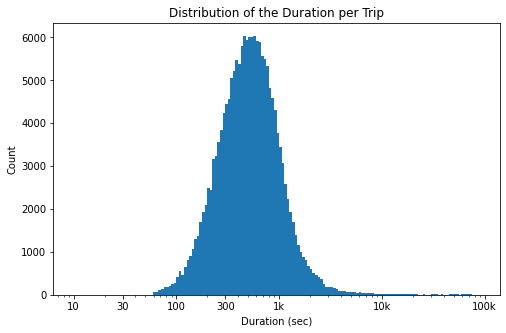

In [4]:
# log-scaled plot for duration
log_binsize = 0.025
bins = 10 ** np.arange(1, np.log10(df_clean['duration_sec'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_clean, x = 'duration_sec', bins = bins)
plt.title("Distribution of the Duration per Trip")
plt.xscale('log')
plt.xticks([10, 30, 100, 300, 1000, 10000, 100000], [10, 30, 100, 300, '1k', '10k', '100k'])
plt.xlabel('Duration (sec)')
plt.ylabel('Count')
plt.show()

## Distribution of the Usage

Generally, the usage is high on weekdays and low on weekends. During the day, morning (8-10 am) and evening (4-6 pm) have the highest usage.

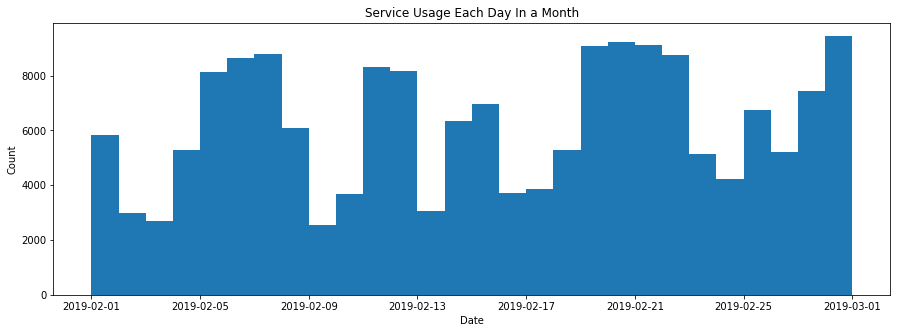

In [5]:
# distribution of the start time each day
bins = 28
plt.figure(figsize = [15,5])
plt.hist(data = df_clean, x = 'start_time', bins = bins)
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Service Usage Each Day In a Month')
plt.show()

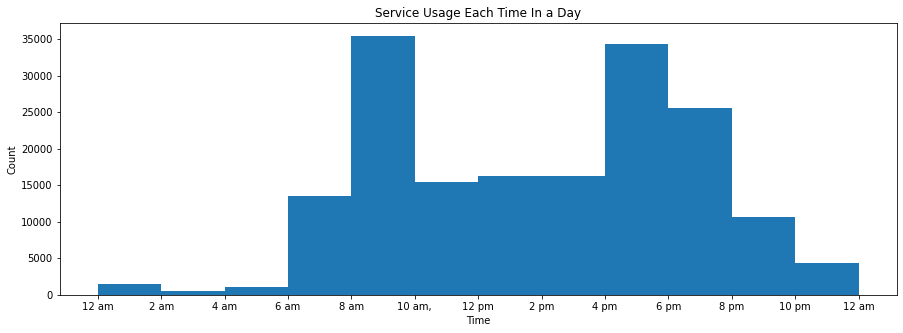

In [6]:
# distribution of the start time at each time slot
start_hour = pd.DatetimeIndex(df_clean['start_time']).hour.to_list()
binsize = 2
bins_hour = np.arange(0,24+binsize,binsize)
ticks_hour = ['12 am', '2 am', '4 am', '6 am', '8 am', '10 am,', '12 pm', '2 pm', '4 pm', '6 pm', '8 pm', '10 pm', '12 am']

plt.figure(figsize = [15,5])
plt.hist(start_hour, bins = bins_hour)
plt.xticks(bins_hour, ticks_hour)
plt.xlabel('Time')
plt.ylabel('Count')
plt.title('Service Usage Each Time In a Day')
plt.show()

## Distribution of the User Type
There are two user types, subscribers and customers. Subscribers are the users who subscribe to the bike-sharing service while customers are the users who do not subscribe to the service.

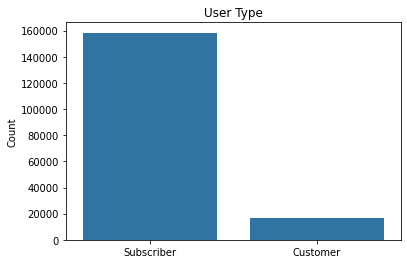

In [7]:
# bar plot for user type
base_color = sb.color_palette()[0]
sb.countplot(data=df_clean, x='user_type', color=base_color, order=['Subscriber', 'Customer'])
plt.xlabel(None)
plt.ylabel('Count')
plt.title('User Type')
plt.show()

## Start Time by User and Trip Type
Start time are investigated for subscribers and customers. Then, it is studied with the yes and the no group for the question of bike-sharing services for all trips.

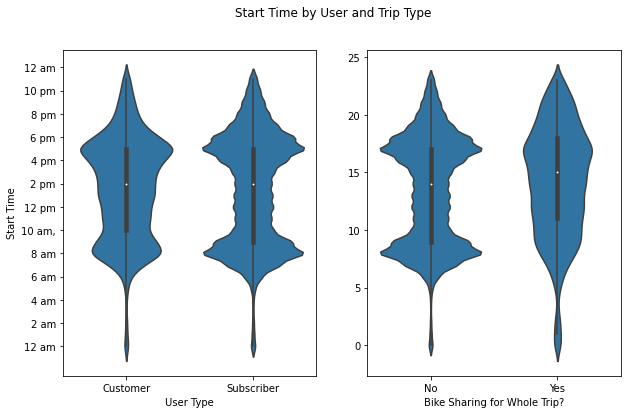

In [8]:
# Start time vs. user and trip type
df_clean['start_hour'] = start_hour
fig, ax = plt.subplots(ncols = 2, figsize = [10,6])
sb.violinplot(data = df_clean, y = 'start_hour', x = 'user_type', ax = ax[0], color = base_color)
ax[0].set_xlabel('User Type')
ax[0].set_yticks(bins_hour)
ax[0].set_yticklabels(ticks_hour)
ax[0].set_ylabel('Start Time')

sb.violinplot(data = df_clean, y = 'start_hour', x = 'bike_share_for_all_trip', ax = ax[1], color = base_color)
ax[1].set_xlabel('Bike Sharing for Whole Trip?')
ax[1].set_ylabel("")
fig.suptitle('Start Time by User and Trip Type')
plt.show()

In [9]:
!jupyter nbconvert Part_II_slide_deck_JN.ipynb --to slides --post serve --no-input --no-prompt

^C
